# Import Libraries

In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [135]:
df = pd.read_excel("Master_Return_File.xlsx")
df.sample(2)

,Unnamed: 0,Mutual_Fund_Name,Scheme_Catagory,Scheme_Code,Scheme_Name,Net_Asset_Value,Date,...,6M_Return_in(%),1Y_Old_NAV,1Y_Return_in(%),3Y_Old_NAV,3Y_Return_in(%),5Y_Old_NAV,5Y_Return_in(%)
303,303,DSP Mutual Fund,Open Ended Schemes ( Debt Scheme - Gilt Fund ),119099,DSP Gilt Fund - Direct Plan - Growth,98.5908,2025-02-11,...,7.516759,89.6227,10.006505,80.7796,6.867315,79.1440,4.492153
593,593,ICICI Prudential Mutual Fund,Open Ended Schemes ( Debt Scheme - Gilt Fund w...,131061,ICICI Prudential Constant Maturity Gilt Fund -...,24.2141,2025-02-11,...,8.869479,22.0247,9.940658,20.0051,6.571857,17.0388,7.281754


In [136]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 500)

In [137]:
df.columns

Index(['Unnamed: 0', 'Mutual_Fund_Name', 'Scheme_Catagory', 'Scheme_Code', 'Scheme_Name', 'Net_Asset_Value', 'Date', '1M_Old_NAV', '1M_Return_in(%)', '3M_Old_NAV', '3M_Return_in(%)', '6M_Old_NAV', '6M_Return_in(%)', '1Y_Old_NAV', '1Y_Return_in(%)', '3Y_Old_NAV', '3Y_Return_in(%)', '5Y_Old_NAV', '5Y_Return_in(%)'], dtype='object')

# Data Cleaning & Missing Value handleing

In [138]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [139]:
df.isna().sum()

Mutual_Fund_Name      0
Scheme_Catagory       0
Scheme_Code           0
Scheme_Name           0
Net_Asset_Value       0
Date                  0
1M_Old_NAV           12
1M_Return_in(%)      25
3M_Old_NAV           55
3M_Return_in(%)      68
6M_Old_NAV          114
6M_Return_in(%)     126
1Y_Old_NAV          185
1Y_Return_in(%)     197
3Y_Old_NAV          493
3Y_Return_in(%)     505
5Y_Old_NAV          661
5Y_Return_in(%)     661
dtype: int64

In [140]:
numerical_columns = [var for var in df.columns if df[var].dtype !='O']
numerical_columns

['Scheme_Code',
 'Net_Asset_Value',
 'Date',
 '1M_Old_NAV',
 '1M_Return_in(%)',
 '3M_Old_NAV',
 '3M_Return_in(%)',
 '6M_Old_NAV',
 '6M_Return_in(%)',
 '1Y_Old_NAV',
 '1Y_Return_in(%)',
 '3Y_Old_NAV',
 '3Y_Return_in(%)',
 '5Y_Old_NAV',
 '5Y_Return_in(%)']

In [141]:
categorical_columns = [var for var in df.columns if df[var].dtype =='O']
categorical_columns

['Mutual_Fund_Name', 'Scheme_Catagory', 'Scheme_Name']

In [142]:
df[numerical_columns].fillna(df[numerical_columns].mean(), inplace=True)

# EDA

In [143]:
df.shape, df.size

((1340, 18), 24120)

In [144]:
df[numerical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Scheme_Code      1340 non-null   int64         
 1   Net_Asset_Value  1340 non-null   float64       
 2   Date             1340 non-null   datetime64[ns]
 3   1M_Old_NAV       1328 non-null   float64       
 4   1M_Return_in(%)  1315 non-null   float64       
 5   3M_Old_NAV       1285 non-null   float64       
 6   3M_Return_in(%)  1272 non-null   float64       
 7   6M_Old_NAV       1226 non-null   float64       
 8   6M_Return_in(%)  1214 non-null   float64       
 9   1Y_Old_NAV       1155 non-null   float64       
 10  1Y_Return_in(%)  1143 non-null   float64       
 11  3Y_Old_NAV       847 non-null    float64       
 12  3Y_Return_in(%)  835 non-null    float64       
 13  5Y_Old_NAV       679 non-null    float64       
 14  5Y_Return_in(%)  679 non-null    float64

In [145]:
df[numerical_columns].describe(include='all', percentiles=[.2,.4,.6,.8])

,Scheme_Code,Net_Asset_Value,Date,1M_Old_NAV,1M_Return_in(%),3M_Old_NAV,3M_Return_in(%),6M_Old_NAV,6M_Return_in(%),1Y_Old_NAV,1Y_Return_in(%),3Y_Old_NAV,3Y_Return_in(%),5Y_Old_NAV,5Y_Return_in(%)
count,1340.000000,1340.000000,1340,1328.000000,1315.000000,1285.000000,1272.000000,1226.000000,1214.000000,1155.000000,1143.000000,847.000000,835.000000,679.000000,679.000000
mean,139264.357463,263.770618,2025-02-11 00:00:00,265.364780,-0.364240,275.617932,-10.354066,283.772973,-2.756775,281.374745,9.832028,315.116938,10.631927,315.199464,12.318274
min,103490.000000,0.000000,2025-02-11 00:00:00,0.000000,-77.405388,0.000000,-54.946187,0.000000,-40.990182,0.000000,-16.147541,0.000000,-77.253934,0.055800,-58.344889
20%,120235.800000,11.851460,2025-02-11 00:00:00,11.833160,-30.810600,12.231960,-30.423810,12.827600,-17.221083,12.633940,5.862175,13.995060,6.597779,14.483780,5.972190
40%,141992.800000,16.621840,2025-02-11 00:00:00,16.964260,-10.684273,18.550220,-19.269346,19.660500,-8.321774,19.320120,8.157691,24.146720,7.788139,25.873920,7.506792
50%,148044.000000,22.577000,2025-02-11 00:00:00,22.785600,0.000000,24.447000,-13.369882,26.526100,-1.916384,25.693000,8.687239,33.103100,10.114697,34.188000,9.693667
60%,149256.800000,32.548320,2025-02-11 00:00:00,33.333480,5.632491,35.543040,-0.019276,37.938400,4.551018,38.879360,9.208223,52.368280,11.603642,46.582840,13.387506
80%,151805.200000,125.206840,2025-02-11 00:00:00,129.441800,11.186252,147.468000,7.304328,158.887900,7.852832,149.557640,12.015978,186.251140,15.334253,170.642280,19.573381
max,153294.000000,6283.854700,2025-02-11 00:00:00,6257.785100,2402.265215,6207.961800,345.799359,6134.849700,194.114923,5986.489100,94.219054,5430.943000,34.838777,5103.344900,65.155458
std,14184.493973,745.422131,NaN,745.358676,77.809622,752.690912,24.391439,755.748762,17.682928,742.684461,7.675905,749.844786,5.960546,750.231524,8.357601


In [146]:
df[categorical_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Mutual_Fund_Name  1340 non-null   object
 1   Scheme_Catagory   1340 non-null   object
 2   Scheme_Name       1340 non-null   object
dtypes: object(3)
memory usage: 31.5+ KB


In [147]:
df[categorical_columns].describe(include='all', percentiles=[.2,.4,.6,.8])

,Mutual_Fund_Name,Scheme_Catagory,Scheme_Name
count,1340,1340,1340
unique,42,40,1340
top,Nippon India Mutual Fund,Open Ended Schemes ( Other Scheme - Index Funds ),Zerodha Gold ETF FoF-Direct Plan - Growth Option
freq,96,255,1


# Custom Mutual Fund Ranking

In [148]:
# df['1M#'] = df['1M_Return_in(%)'].rank(method= "dense", ascending= False)
df['3M#'] = df['3M_Return_in(%)'].rank(method= "dense", ascending= False)
df['6M#'] = df['6M_Return_in(%)'].rank(method= "dense", ascending= False)
df['1Y#'] = df['1Y_Return_in(%)'].rank(method= "dense", ascending= False)
df['3Y#'] = df['3Y_Return_in(%)'].rank(method= "dense", ascending= False)
df['5Y#'] = df['5Y_Return_in(%)'].rank(method= "dense", ascending= False)
# df['#'] = 0.1*df['1M#'] + 0.25*df['3M#'] + 0.5*df['6M#'] + df['1Y#'] + 3*df['3Y#'] + 5*df['5Y#']
df['#'] = 0.25*df['3M#'] + 0.5*df['6M#'] + df['1Y#'] + 3*df['3Y#'] + 5*df['5Y#']
df.sort_values('#').head(20)

,Mutual_Fund_Name,Scheme_Catagory,Scheme_Code,Scheme_Name,Net_Asset_Value,Date,1M_Old_NAV,...,5Y_Return_in(%),3M#,6M#,1Y#,3Y#,5Y#,#
922,Motilal Oswal Mutual Fund,Open Ended Schemes ( Other Scheme - FoF Domest...,145552,Motilal Oswal Nasdaq 100 Fund of Fund- Direct ...,44.2042,2025-02-11,40.2402,...,27.390191,6.0,4.0,6.0,17.0,25.0,185.50
893,Motilal Oswal Mutual Fund,Open Ended Schemes ( Equity Scheme - Mid Cap F...,127042,Motilal Oswal Midcap Fund-Direct Plan-Growth O...,107.0499,2025-02-11,114.4182,...,30.482046,1109.0,701.0,47.0,4.0,11.0,741.75
287,DSP Mutual Fund,Open Ended Schemes ( Equity Scheme - Sectoral/...,145454,DSP Healthcare Fund - Direct Plan - Growth,41.7280,2025-02-11,44.8650,...,30.744997,940.0,483.0,49.0,62.0,10.0,761.50
1180,Tata Mutual Fund,Open Ended Schemes ( Equity Scheme - Sectoral/...,135810,Tata India Pharma & Healthcare Fund-Direct Pla...,33.0450,2025-02-11,34.4682,...,27.403293,718.0,671.0,65.0,53.0,23.0,854.00
392,Franklin Templeton Mutual Fund,Open Ended Schemes ( Equity Scheme - Sectoral/...,118539,Franklin India Opportunities Fund - Direct - G...,249.8517,2025-02-11,257.8495,...,26.904061,928.0,853.0,74.0,12.0,33.0,933.50
441,HDFC Mutual Fund,Open Ended Schemes ( Equity Scheme - Focused F...,118950,HDFC Focused 30 Fund - Growth Option - Direct ...,234.8660,2025-02-11,234.9720,...,23.768090,698.0,578.0,81.0,14.0,70.0,936.50
335,Edelweiss Mutual Fund,Open Ended Schemes ( Equity Scheme - Mid Cap F...,140228,Edelweiss Mid Cap Fund - Direct Plan - Growth ...,101.8130,2025-02-11,107.0530,...,28.653962,1073.0,823.0,116.0,24.0,19.0,962.75
1266,UTI Mutual Fund,Open Ended Schemes ( Equity Scheme - Sectoral/...,120782,UTI Healthcare Fund - Direct Plan - Growth Option,296.4579,2025-02-11,311.2025,...,26.888960,872.0,571.0,58.0,79.0,34.0,968.50
642,Invesco Mutual Fund,Open Ended Schemes ( Equity Scheme - Mid Cap F...,120403,Invesco India Midcap Fund - Direct Plan - Grow...,178.0700,2025-02-11,188.5100,...,26.340246,953.0,685.0,77.0,59.0,39.0,1029.75
643,Invesco Mutual Fund,Open Ended Schemes ( Equity Scheme - Small Cap...,145137,Invesco India Smallcap Fund - Direct Plan - Gr...,40.5600,2025-02-11,43.0500,...,29.867094,1035.0,775.0,179.0,51.0,14.0,1048.25


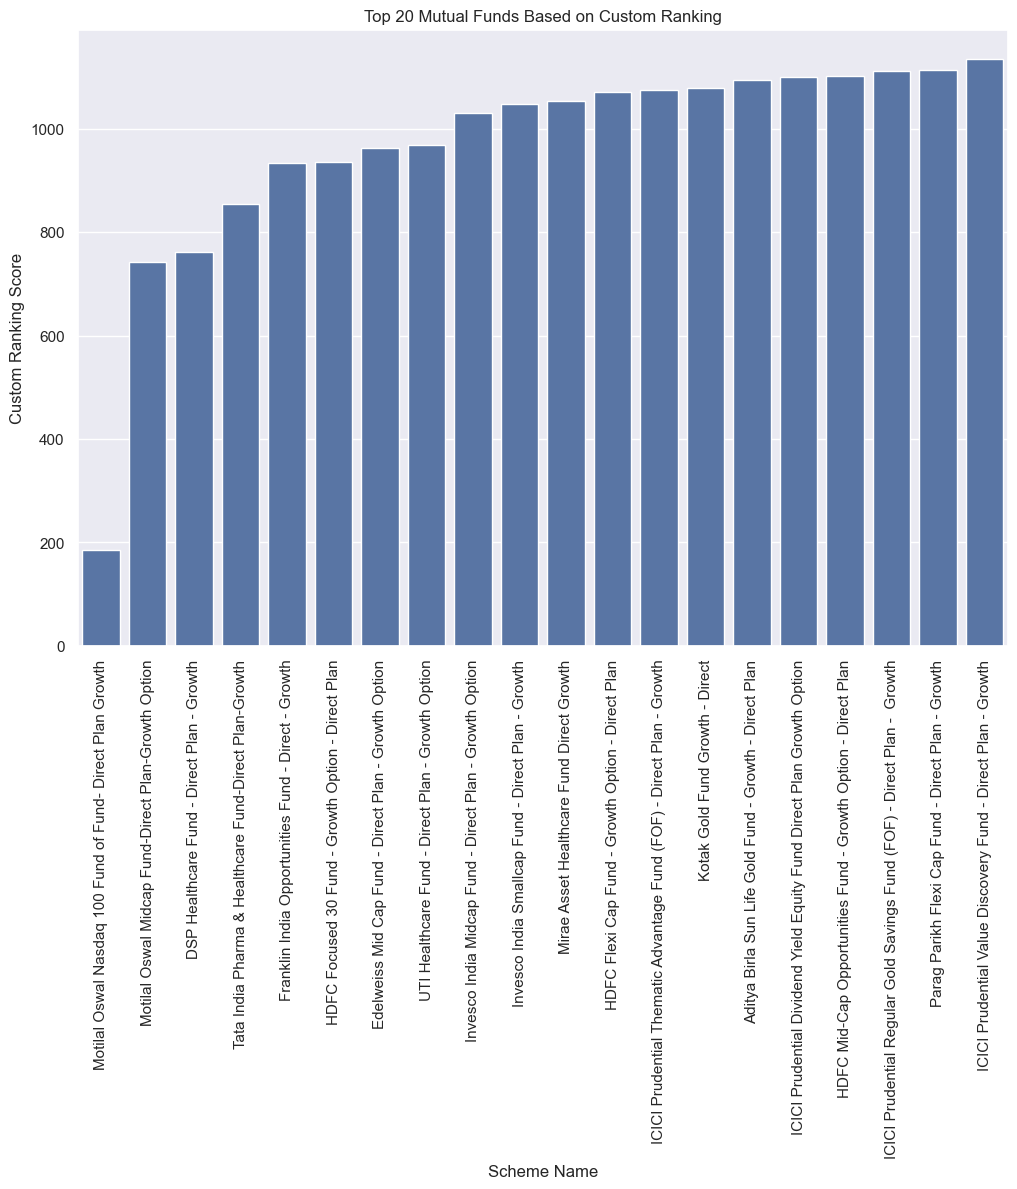

In [149]:
plt.figure(figsize=(12, 8))
sns.barplot(x=df.sort_values('#').head(20)['Scheme_Name'], y=df.sort_values('#').head(20)['#'])
plt.title('Top 20 Mutual Funds Based on Custom Ranking')
plt.xlabel('Scheme Name')
plt.ylabel('Custom Ranking Score')
plt.xticks(rotation=90)
plt.show()

In [150]:
df['Mutual_Fund_Name'].value_counts(), len(df['Mutual_Fund_Name'].unique())

(Mutual_Fund_Name
 Nippon India Mutual Fund                                    96
 ICICI Prudential Mutual Fund                                88
 Aditya Birla Sun Life Mutual Fund                           82
 Kotak Mahindra Mutual Fund                                  71
 Axis Mutual Fund                                            70
 HDFC Mutual Fund                                            67
 UTI Mutual Fund                                             61
 Tata Mutual Fund                                            57
 DSP Mutual Fund                                             54
 Edelweiss Mutual Fund                                       50
 Bandhan Mutual Fund                                         48
 Mirae Asset Mutual Fund                                     46
 HSBC Mutual Fund                                            45
 Baroda BNP Paribas Mutual Fund                              39
 Invesco Mutual Fund                                         38
 Franklin Templeton Mu

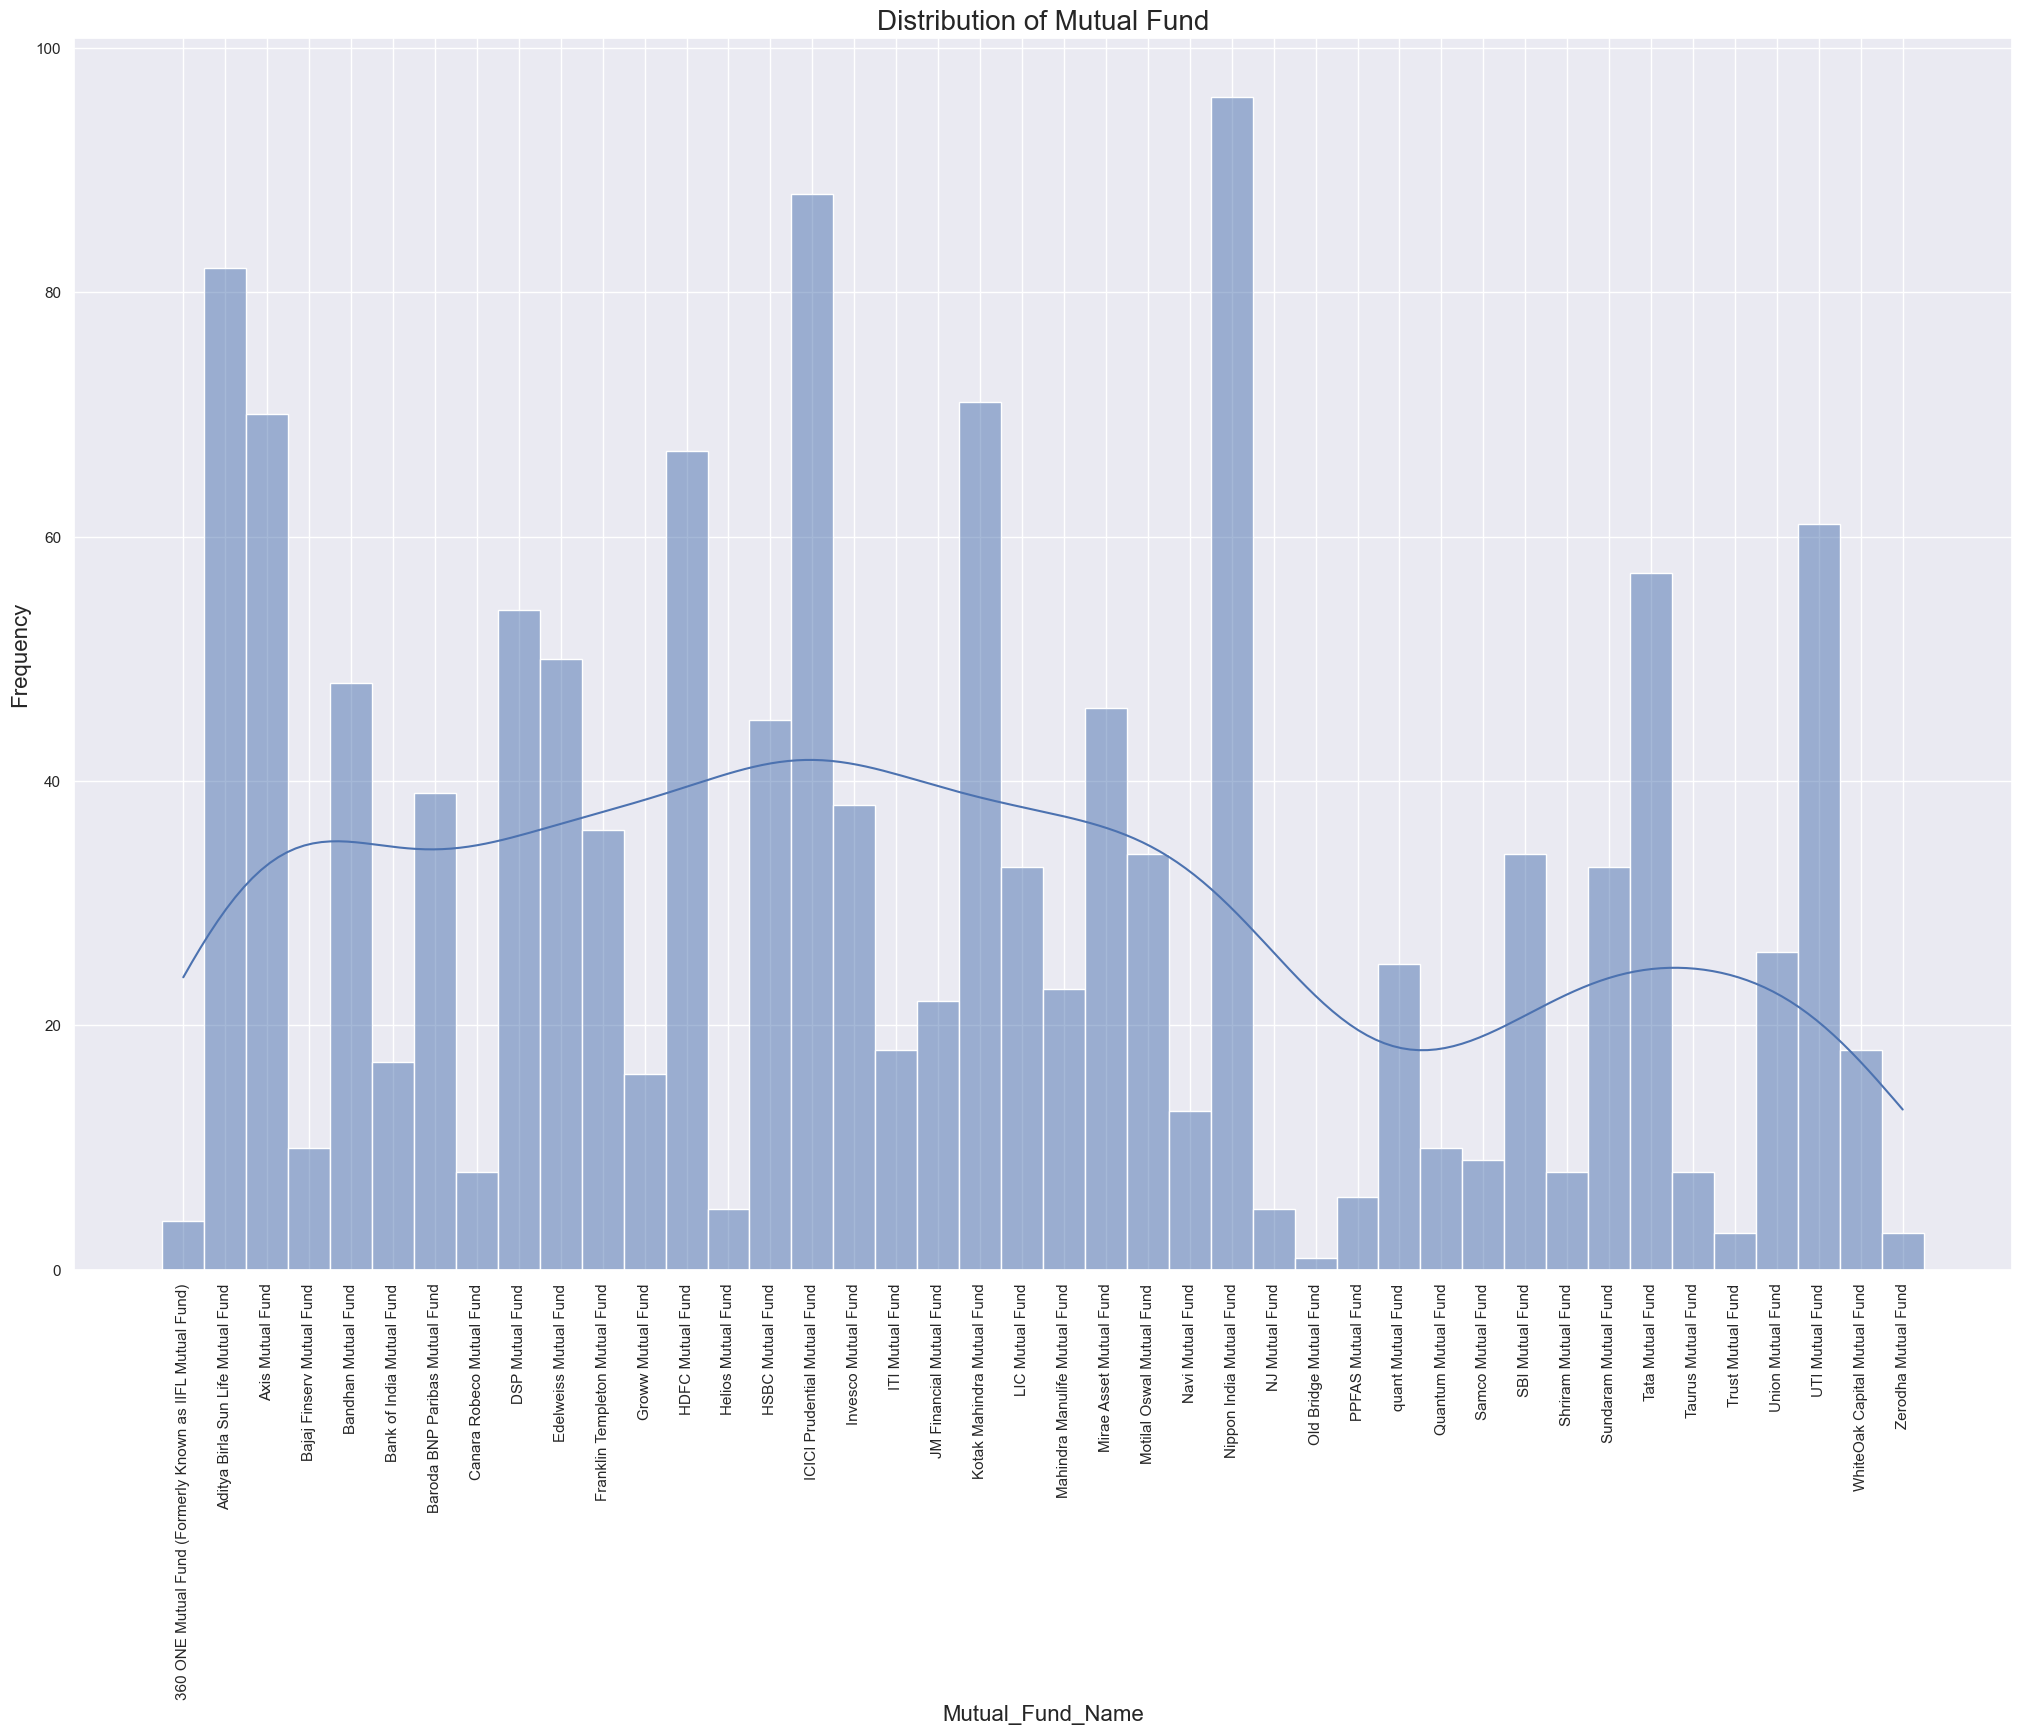

In [151]:
# Distribution plot for Mutual Fund column
plt.figure(figsize=(25, 16))
sns.histplot(df['Mutual_Fund_Name'], kde=True)
plt.title('Distribution of Mutual Fund', fontsize=20)
plt.xlabel('Mutual_Fund_Name', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Frequency', fontsize=16)
plt.show()

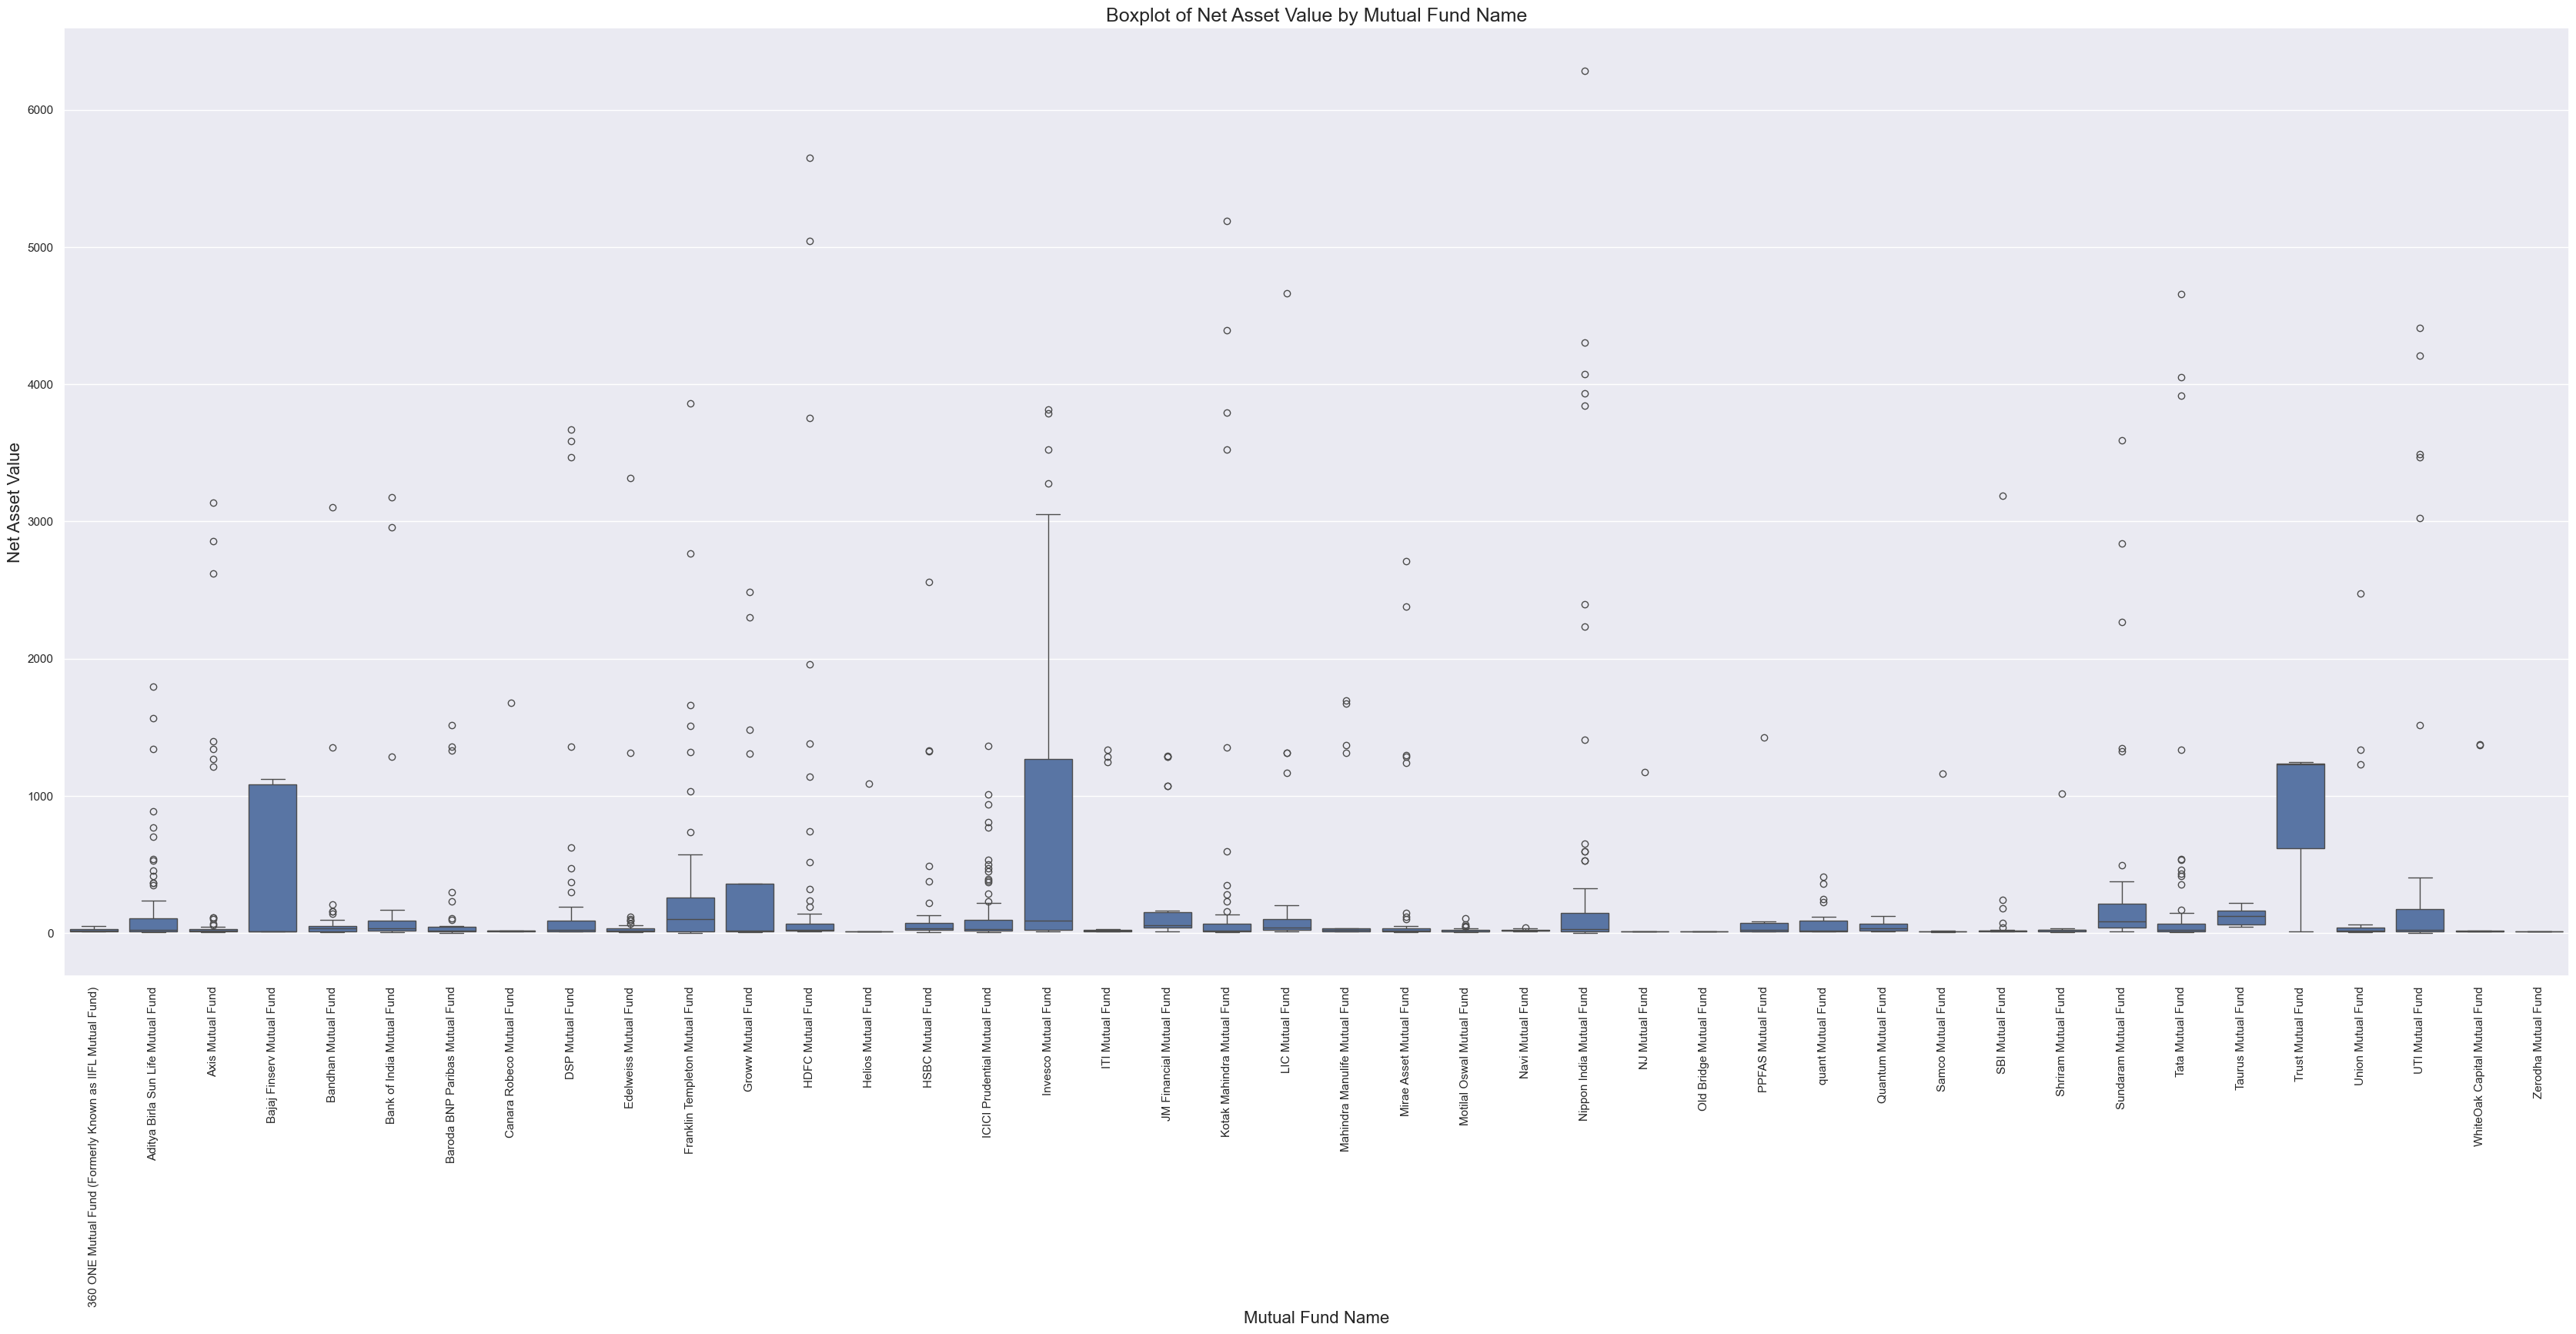

In [152]:
# Example 2: Box plot of a numerical column grouped by a categorical column
plt.figure(figsize=(42, 16))
sns.boxplot(x='Mutual_Fund_Name', y='Net_Asset_Value', data=df) # Replace with actual column names
plt.title('Boxplot of Net Asset Value by Mutual Fund Name', fontsize=18)
plt.xlabel('Mutual Fund Name', fontsize=16)
plt.xticks(rotation=90)
plt.ylabel('Net Asset Value', fontsize=16)
# plt.xticks(rotation=45)
plt.show()

In [153]:
return_columns = ['5Y_Return_in(%)', '3Y_Return_in(%)', '1Y_Return_in(%)', '6M_Return_in(%)', '3M_Return_in(%)', '1M_Return_in(%)']
plot_df = df[['Net_Asset_Value'] + return_columns]
plot_df = pd.melt(plot_df, id_vars=['Net_Asset_Value'], value_vars=return_columns, var_name='Return_Period', value_name='Return_Value')
plot_df

,Net_Asset_Value,Return_Period,Return_Value
0,48.4818,5Y_Return_in(%),20.332057
1,12.9206,5Y_Return_in(%),NaN
2,22.8738,5Y_Return_in(%),7.345544
3,12.1664,5Y_Return_in(%),NaN
4,18.4400,5Y_Return_in(%),NaN
...,...,...,...
8035,10.3220,1M_Return_in(%),8.254635
8036,16.1120,1M_Return_in(%),-28.199839
8037,12.3745,1M_Return_in(%),-17.241790
8038,12.3632,1M_Return_in(%),-17.279704


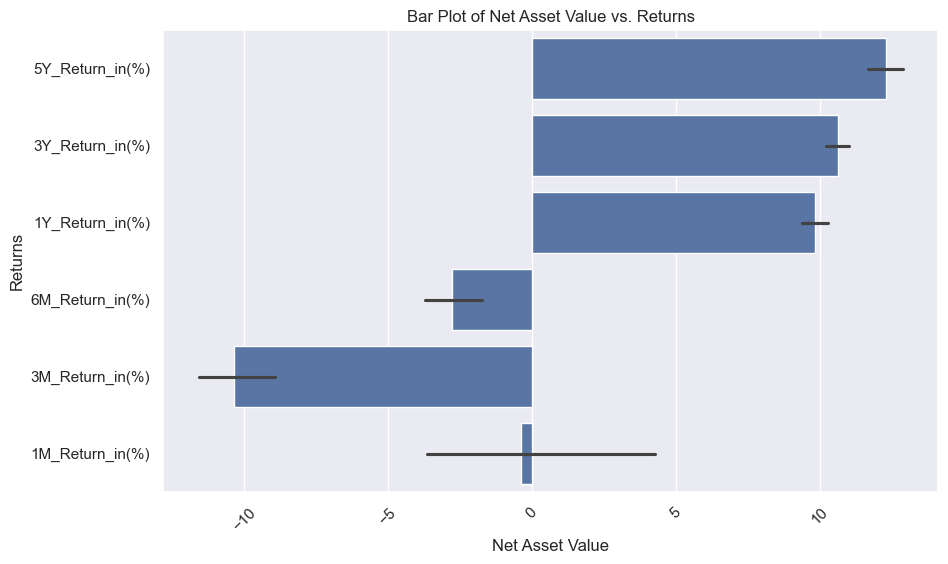

In [154]:
# Box plot of NAV vs Returns
plt.figure(figsize=(10, 6))
sns.barplot(y='Return_Period', x='Return_Value', data=plot_df)  
plt.title('Bar Plot of Net Asset Value vs. Returns')
plt.ylabel('Returns')
plt.xlabel('Net Asset Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [155]:
categorical_columns

['Mutual_Fund_Name', 'Scheme_Catagory', 'Scheme_Name']

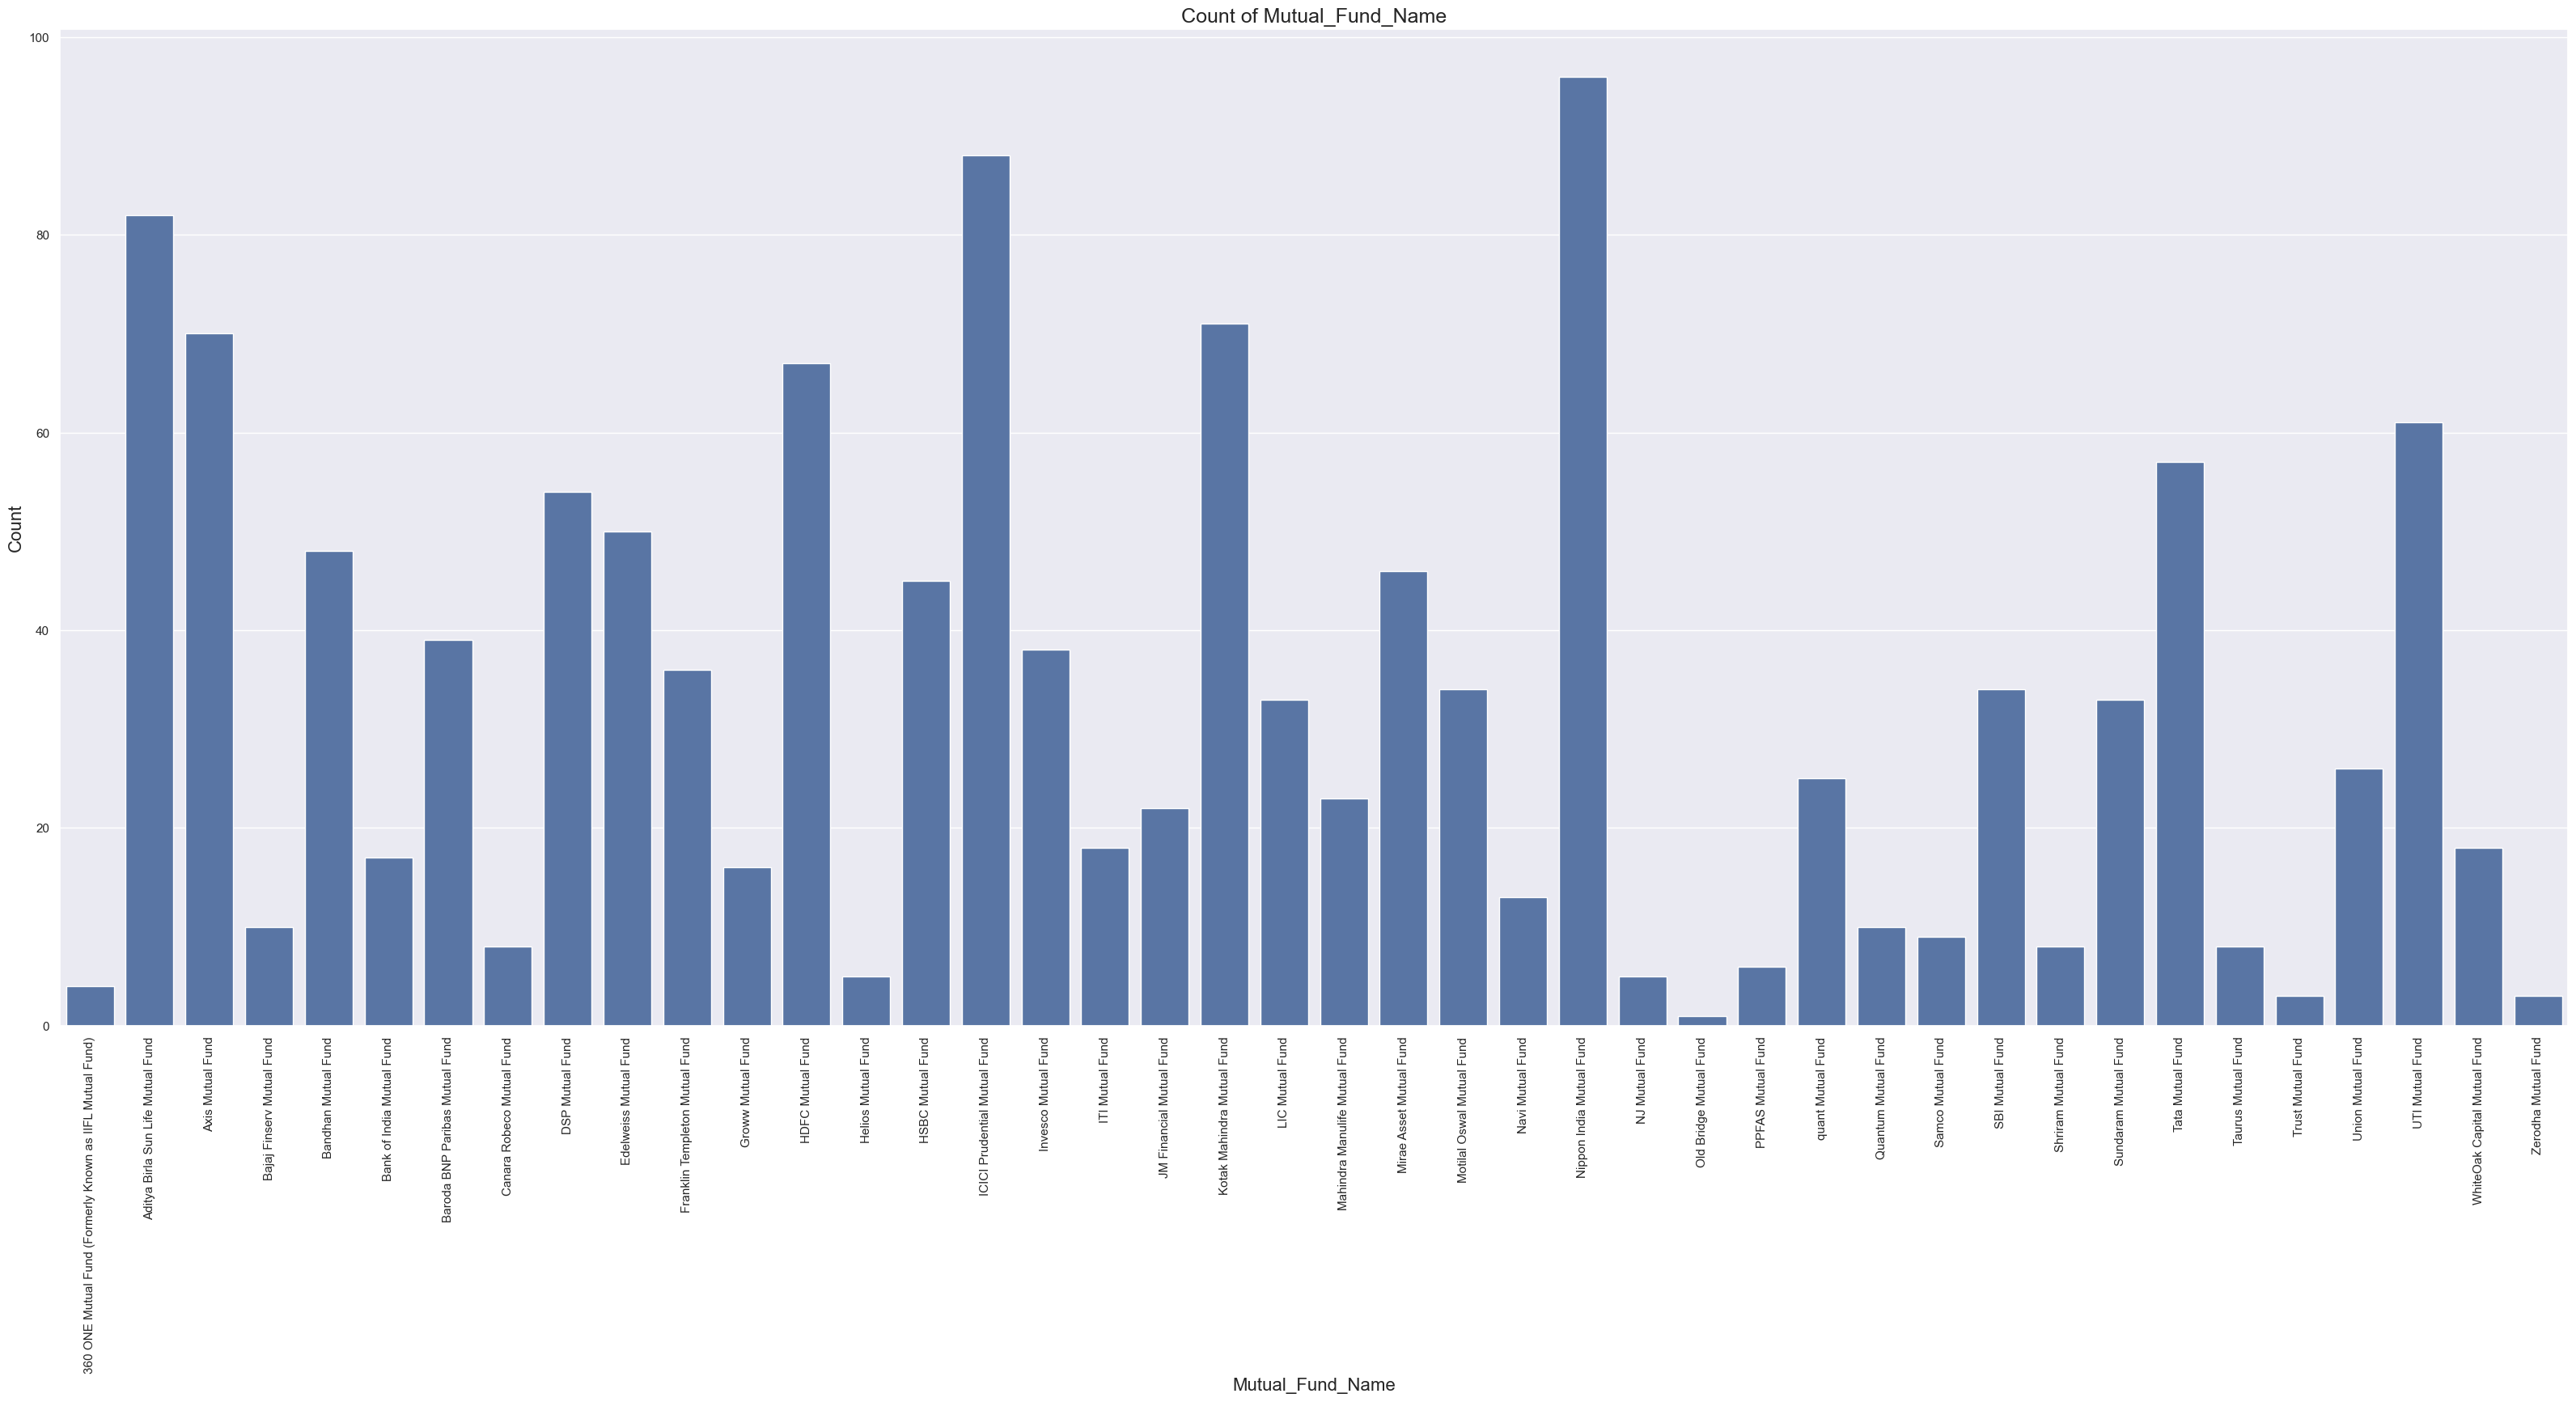

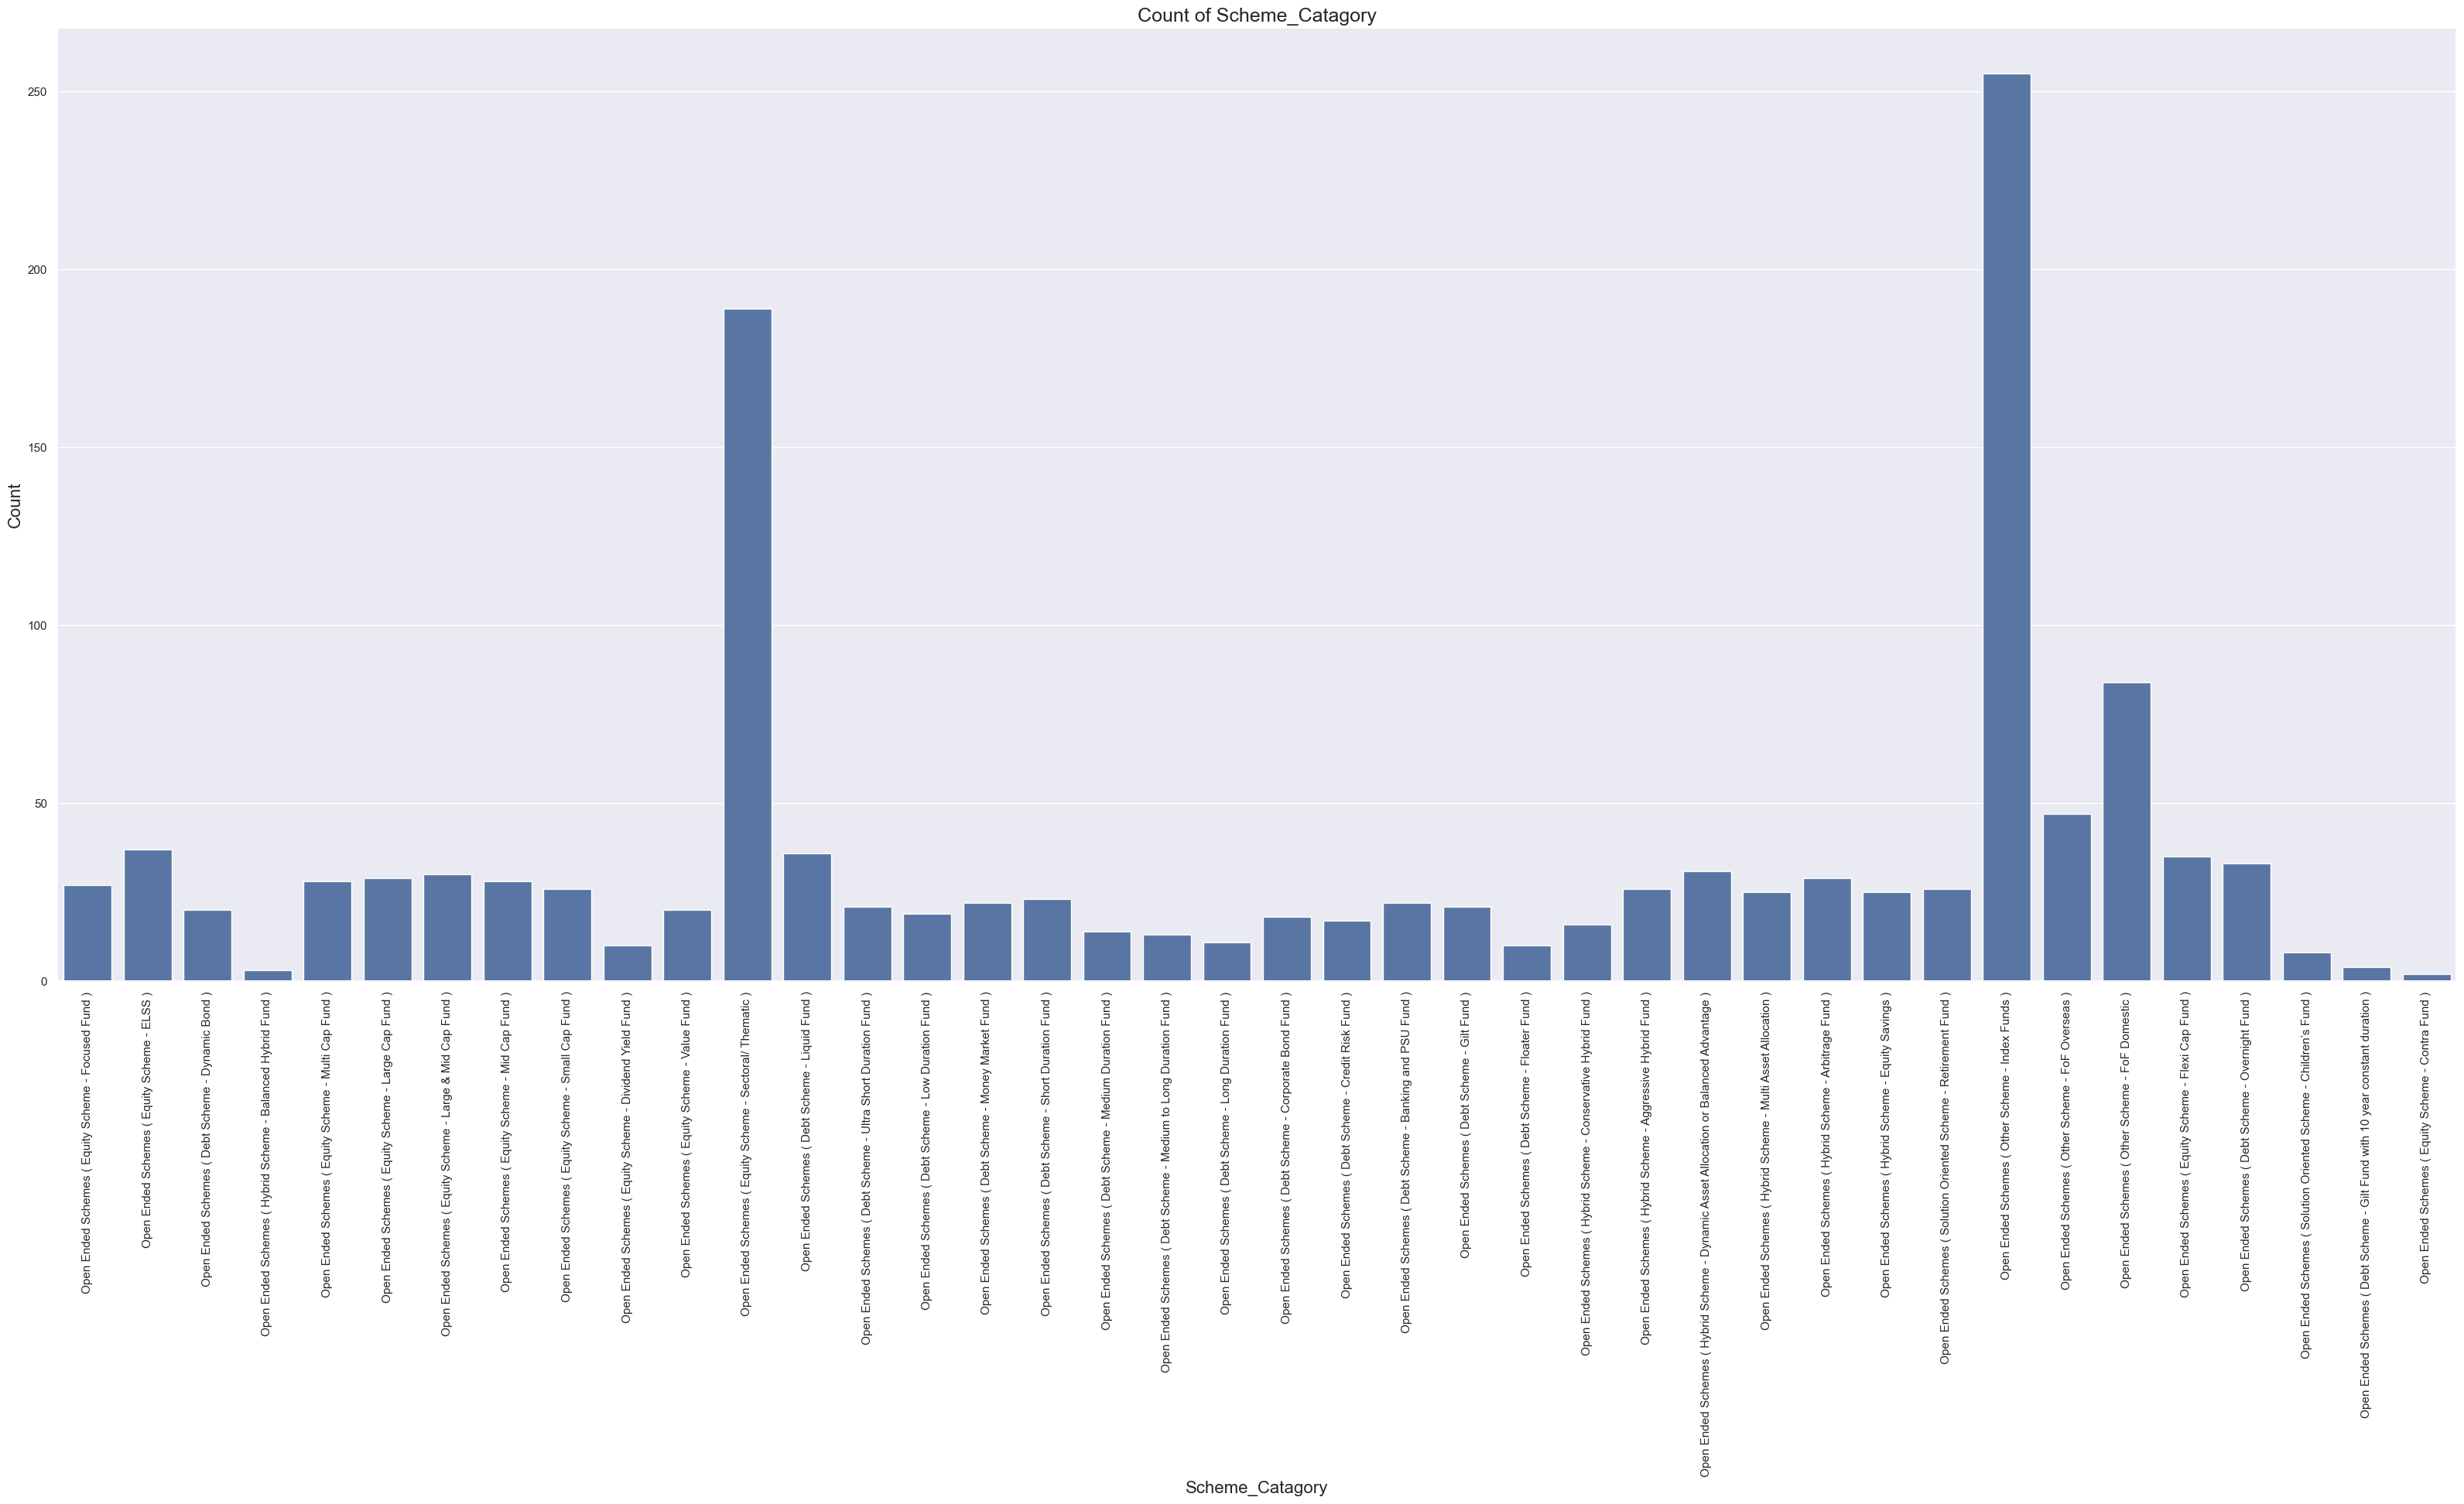

In [156]:
# Example 4: Countplot of categorical columns
for col in ['Mutual_Fund_Name', 'Scheme_Catagory']:
	plt.figure(figsize=(40, 16))
	sns.countplot(x=col, data=df)
	plt.title(f'Count of {col}', fontsize=18)
	plt.xlabel(col, fontsize=16)
	plt.ylabel('Count', fontsize=16)
	plt.xticks(rotation=90)
	plt.show()

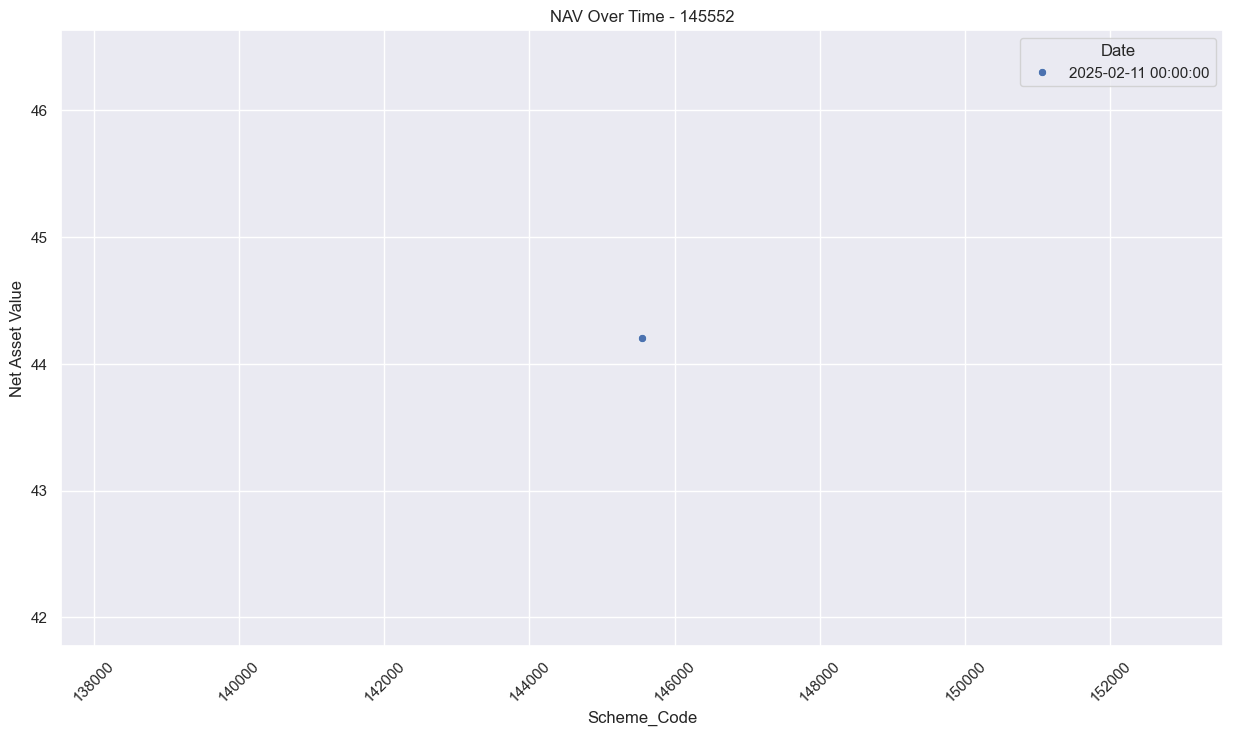

In [157]:
# sns.set(style= 'darkgrid')

plt.figure(figsize=(15,8))
# sns.lineplot(x='Date', y='Net_Asset_Value', data=df[''])

sns.set(rc={'figure.figsize':(3,2)})
# ax = sns.lineplot(y="Net_Asset_Value", x="Mutual_Fund_Name", data = df[df['Mutual_Fund_Name']=="Nippon India Mutual Fund"])
ax = sns.scatterplot(y="Net_Asset_Value", x="Scheme_Code", data = df[df['Scheme_Code']==145552], hue= 'Date')

plt.xlabel('Scheme_Code')
plt.ylabel('Net Asset Value')
plt.title('NAV Over Time - {}'.format(145552))

plt.xticks(rotation=45)
plt.show()

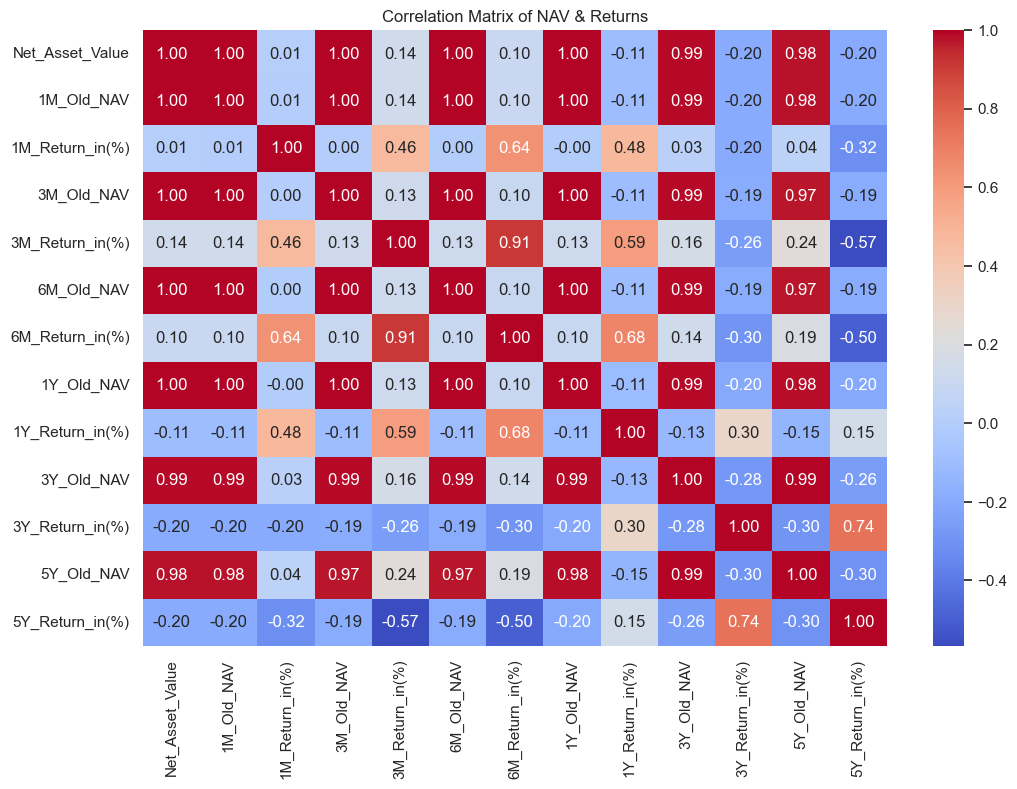

In [158]:
# Correlation Matrix

# Exclude 'Date' and 'Scheme_Code' columns from numerical_columns
numerical_columns_excluding_date = [col for col in numerical_columns if col != 'Date' and col != 'Scheme_Code']

plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns_excluding_date].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of NAV & Returns")
plt.show()


# Model Selection & Evaluation

In [159]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [160]:
# Clustering Mutual Funds Based on Performance

X = df[['1M_Return_in(%)', '3M_Return_in(%)', '6M_Return_in(%)', '1Y_Return_in(%)', '3Y_Return_in(%)', '5Y_Return_in(%)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.0133807 , -0.65349618, -0.90156299, -0.2775037 ,  0.12962682,
         0.95956854],
       [ 0.01946131, -0.2321326 , -0.38539144, -0.35775334,         nan,
                nan],
       [ 0.150447  ,  0.69871318,  0.64437907,  0.00905509, -0.57187751,
        -0.59543357],
       ...,
       [-0.21699079, -0.65181693, -0.79286947, -0.37302597,         nan,
                nan],
       [-0.21747824, -0.65453052, -0.79820629, -0.38684088,         nan,
                nan],
       [ 2.1600269 ,         nan,         nan,         nan,         nan,
                nan]], shape=(1340, 6))

In [161]:
# Handle missing values by filling them with the mean of each column

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_imputed)

In [162]:
# Step 5: Mutual Fund Performance Prediction

X_train, X_test, y_train, y_test = train_test_split(X, df['Net_Asset_Value'], test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [163]:
# Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 560.0487216061784


In [164]:
# Step 6: Ranking Funds Based on Performance
df['Sharpe_Ratio'] = df['5Y_Return_in(%)'] / df['5Y_Old_NAV'].std()
ranked_funds = df.sort_values(by=['Sharpe_Ratio', '5Y_Return_in(%)'], ascending=False)
print("Top Recommended Mutual Funds:\n", ranked_funds[['Mutual_Fund_Name', 'Scheme_Name', '5Y_Return_in(%)', 'Sharpe_Ratio']].head(10))


Top Recommended Mutual Funds:
                   Mutual_Fund_Name                                        Scheme_Name  5Y_Return_in(%)  Sharpe_Ratio
579   ICICI Prudential Mutual Fund  ICICI Prudential Overnight Fund - Direct Plan ...        65.155458      0.086847
1048             quant Mutual Fund  quant Small Cap Fund - Growth Option - Direct ...        43.848446      0.058447
217      Bank of India Mutual Fund    BANK OF INDIA Small Cap Fund Direct Plan Growth        34.183109      0.045563
1057             quant Mutual Fund  quant Infrastructure Fund - Growth Option-Dire...        33.352926      0.044457
945       Nippon India Mutual Fund  Nippon India Small Cap Fund - Direct Plan Grow...        32.452335      0.043256
946       Nippon India Mutual Fund  Nippon India Small Cap Fund - Direct Plan Grow...        32.452335      0.043256
1047             quant Mutual Fund   quant Mid Cap Fund - Growth Option - Direct Plan        32.054794      0.042727
336          Edelweiss Mutual Fun

Based on the analysis conducted in the Jupyter Notebook, here are some key findings:

1. **Data Collection and Cleaning**:
     - The dataset contains information on various mutual funds, including their returns over different periods (1M, 3M, 6M, 1Y, 3Y, 5Y).
     - Missing values in the numerical columns were handled by filling them with the mean of each column.

2. **Exploratory Data Analysis (EDA)**:
     - The dataset was explored to understand the distribution and characteristics of the mutual funds.
     - Various plots were generated to visualize the data, including bar plots, box plots, and scatter plots.
     - A correlation matrix was created to understand the relationships between different numerical variables.

3. **Ranking of Mutual Funds**:
     - Custom rankings were created based on the returns over different periods.
     - The top 20 mutual funds were identified based on a custom ranking score.
     - A bar plot was generated to visualize the top 20 mutual funds based on the custom ranking.

4. **Clustering**:
     - Mutual funds were clustered based on their performance using the KMeans algorithm.
     - The dataset was scaled and imputed to handle missing values before clustering.
     - Four clusters were identified, and each mutual fund was assigned to one of these clusters.

5. **Principal Component Analysis (PCA)**:
     - PCA was performed to reduce the dimensionality of the dataset.
     - The first two principal components were extracted and used for further analysis.

6. **Mutual Fund Performance Prediction**:
     - A RandomForestRegressor model was trained to predict the Net Asset Value (NAV) of mutual funds.
     - The model was evaluated using the Root Mean Squared Error (RMSE), which was found to be approximately 560.05.

7. **Sharpe Ratio Calculation**:
     - The Sharpe Ratio was calculated for each mutual fund to assess its risk-adjusted return.
     - Mutual funds were ranked based on their Sharpe Ratio and 5Y returns.
     - The top recommended mutual funds were identified based on these rankings.

These findings provide valuable insights into the performance and characteristics of various mutual funds, helping investors make informed decisions.